<a href="https://colab.research.google.com/github/gytjr8422/SOCAR-AI-BOOT-CAMP/blob/codeReview/HW2_hskim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
tada_eta = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/data/tada_eta.xlsx')
print(tada_eta.columns)
tada_eta.head()

Index(['ATA', 'id', 'api_eta', 'created_at_kst', 'month', 'pickup_lng',
       'pickup_lat', 'pickup_gu', 'driver_id', 'driver_lng', 'driver_lat',
       'hour'],
      dtype='object')


,ATA,id,api_eta,created_at_kst,month,pickup_lng,pickup_lat,pickup_gu,driver_id,driver_lng,driver_lat,hour
0,10.60,R4L9FL6NVEL4D0,5.65,2019-12-01T00:55:09,12,127.091399,37.624545,노원구,DST52944,127.069978,37.616472,0
1,9.20,R3A7JBY7CS6TPD,8.60,2019-12-01T00:09:39,12,127.023351,37.625564,강북구,DPC72995,127.026479,37.604711,0
2,10.85,R2BIUY1TDK14XE,10.53,2019-12-15T00:18:42,12,126.881154,37.481641,금천구,DPP94923,126.906225,37.452167,0
3,5.52,R31PU5GNHSGU6C,1.92,2019-07-31T00:24:11,7,126.988375,37.567897,중구,DCT73585,126.991170,37.566416,0
4,8.60,R41WR6N1VT42DJ,7.10,2019-07-05T00:40:34,7,126.988684,37.566716,중구,DPJ86237,127.006860,37.571164,0


In [ ]:
tada_eta = tada_eta.drop(['id', 'created_at_kst', 'month', 'driver_id', 'pickup_gu'],1)
tada_eta.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,ATA,api_eta,pickup_lng,pickup_lat,driver_lng,driver_lat,hour
0,10.60,5.65,127.091399,37.624545,127.069978,37.616472,0
1,9.20,8.60,127.023351,37.625564,127.026479,37.604711,0
2,10.85,10.53,126.881154,37.481641,126.906225,37.452167,0
3,5.52,1.92,126.988375,37.567897,126.991170,37.566416,0
4,8.60,7.10,126.988684,37.566716,127.006860,37.571164,0


In [ ]:
tada_eta = tada_eta.sample(frac=1).reset_index(drop=True) # frac=1: 전체 개수만큼 샘플링 하겠다. 비복원 추출.
tada_eta.head()

,ATA,api_eta,pickup_lng,pickup_lat,driver_lng,driver_lat,hour
0,7.62,8.78,126.923424,37.557662,126.901942,37.564928,22
1,8.68,7.07,126.866472,37.548842,126.898101,37.536160,12
2,2.22,3.38,127.002217,37.494619,127.007126,37.491713,9
3,18.00,12.57,127.014258,37.595043,127.002118,37.570948,9
4,11.32,6.77,126.922514,37.552353,126.937746,37.551076,23


In [ ]:
tada_eta.shape

(13916, 7)

In [ ]:
train = tada_eta[:12000]
test = tada_eta[12000:]

In [ ]:
x_train = np.asarray(train.drop('ATA', 1))
y_train = np.asarray(train['ATA'])
x_test = np.asarray(test.drop('ATA', 1))
y_test = np.asarray(test['ATA'])
eta_features = [x for i, x in enumerate(tada_eta.columns) if i!=0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
eta_features

['api_eta', 'pickup_lng', 'pickup_lat', 'driver_lng', 'driver_lat', 'hour']

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

In [ ]:
reg = XGBRegressor(max_depth=5, learning_rate=0.05, n_estimators=60)
reg.fit(x_train, y_train)

mse = mean_squared_error(y_test, reg.predict(x_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The initial error of API ETA on test set: {:.4f}".format(mean_squared_error(y_test, x_test[:,0]) ))

mae = mean_absolute_error(y_test, reg.predict(x_test))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
print("The initial error of API ETA on test set: {:.4f}".format(mean_absolute_error(y_test, x_test[:,0]) ))

[06:44:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The mean squared error (MSE) on test set: 7.8202
The initial error of API ETA on test set: 12.3723
The mean absolute error (MAE) on test set: 1.9750
The initial error of API ETA on test set: 2.5180


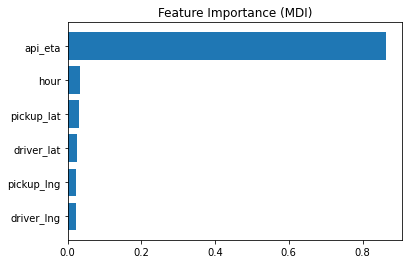

In [ ]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure()
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(eta_features)[sorted_idx])
plt.title('Feature Importance (MDI)')
plt.show()